# WeatherPy

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | koryazhma
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | alice springs
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | barcelos
Processing Record 16 of Set 1 | mumford
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | susuman
Processing Record 22 of Set 1 | kolonia

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,10.45,78,9,2.14,ZA,1683518225
1,albany,42.6001,-73.9662,14.24,80,100,1.84,US,1683517991
2,adamstown,-25.0660,-130.1015,21.81,57,100,9.86,PN,1683518212
3,grytviken,-54.2811,-36.5092,2.03,97,96,4.64,GS,1683518226
4,port alfred,-33.5906,26.8910,18.44,73,96,5.08,ZA,1683518227


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,10.45,78,9,2.14,ZA,1683518225
1,albany,42.6001,-73.9662,14.24,80,100,1.84,US,1683517991
2,adamstown,-25.0660,-130.1015,21.81,57,100,9.86,PN,1683518212
3,grytviken,-54.2811,-36.5092,2.03,97,96,4.64,GS,1683518226
4,port alfred,-33.5906,26.8910,18.44,73,96,5.08,ZA,1683518227


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

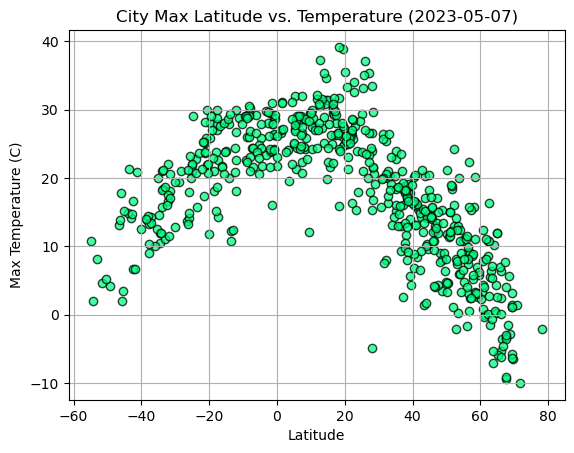

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors='black',alpha=0.75,color='springgreen')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
current_date = time.localtime()
current_date_formatted = time.strftime("%Y-%m-%d", current_date)
plt.title(f'City Max Latitude vs. Temperature ({current_date_formatted})')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

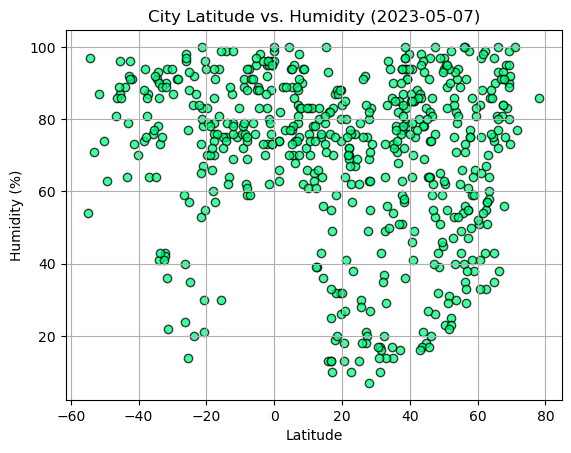

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values_2 = city_data_df['Lat']
y_values_2 = city_data_df['Humidity']
plt.scatter(x_values_2,y_values_2,edgecolors='black',alpha=0.75,color='springgreen')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
current_date = time.localtime()
current_date_formatted = time.strftime("%Y-%m-%d", current_date)
plt.title(f'City Latitude vs. Humidity ({current_date_formatted})')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

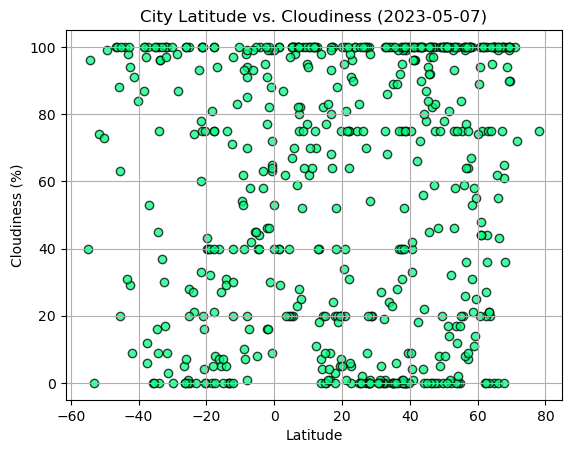

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values_3 = city_data_df['Lat']
y_values_3 = city_data_df['Cloudiness']
plt.scatter(x_values_3,y_values_3,edgecolors='black',alpha=0.75,color='springgreen')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
current_date = time.localtime()
current_date_formatted = time.strftime("%Y-%m-%d", current_date)
plt.title(f'City Latitude vs. Cloudiness ({current_date_formatted})')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

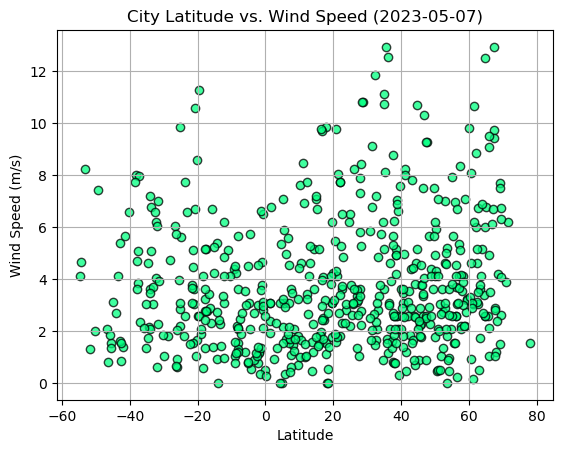

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values_4 = city_data_df['Lat']
y_values_4 = city_data_df['Wind Speed']
plt.scatter(x_values_4,y_values_4,edgecolors='black',alpha=0.75,color='springgreen')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
current_date = time.localtime()
current_date_formatted = time.strftime("%Y-%m-%d", current_date)
plt.title(f'City Latitude vs. Wind Speed ({current_date_formatted})')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, line_pos, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y,edgecolors='black',alpha=0.75,color='springgreen')
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,line_pos,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is: {rvalue}")
    plt.show()
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,14.24,80,100,1.84,US,1683517991
6,koryazhma,61.3143,47.1691,-0.09,88,75,3.03,RU,1683518228
9,pacific grove,36.6177,-121.9166,12.91,82,0,3.09,US,1683518014
11,wailua homesteads,22.0669,-159.3780,26.24,70,75,7.72,US,1683518230
12,anadyr,64.7500,177.4833,0.28,74,0,6.00,RU,1683517944


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,10.45,78,9,2.14,ZA,1683518225
2,adamstown,-25.0660,-130.1015,21.81,57,100,9.86,PN,1683518212
3,grytviken,-54.2811,-36.5092,2.03,97,96,4.64,GS,1683518226
4,port alfred,-33.5906,26.8910,18.44,73,96,5.08,ZA,1683518227
5,blackmans bay,-43.0167,147.3167,14.07,79,98,5.37,AU,1683518227


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8482491290996269


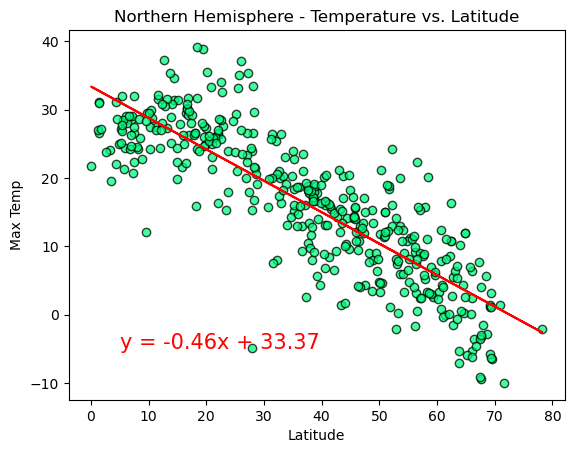

In [18]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],(5,-5), x_label='Latitude', y_label='Max Temp', title = 'Northern Hemisphere - Temperature vs. Latitude')

The r-value is: 0.7588656179968609


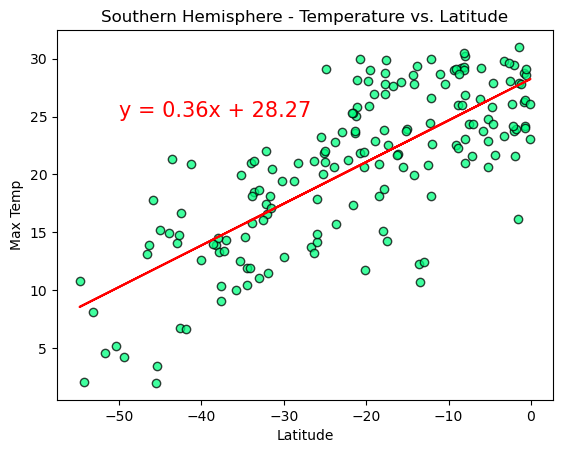

In [20]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],(-50,25), x_label='Latitude', y_label='Max Temp', title = 'Southern Hemisphere - Temperature vs. Latitude')

**Discussion about the linear relationship:**

Based on these two graphs, we can conclude that there is a strong relationship between temperature and latitude. This is because in each graph, the temperature seems to rise as we get closer to the equator (latitude = 0). This is shown through the positive correlation between temperature and latitude in the Northern Hemisphere and the negative correlation in the Southern Hemisphere and their relatively high r-values.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03793540927025363


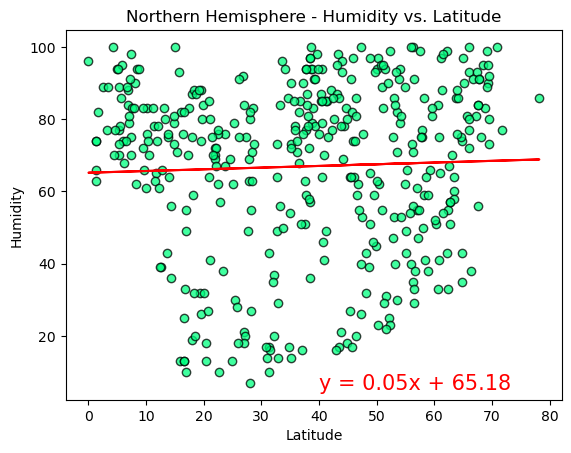

In [24]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],(40,5), x_label='Latitude', y_label='Humidity', title = 'Northern Hemisphere - Humidity vs. Latitude')

The r-value is: 0.11844105832961226


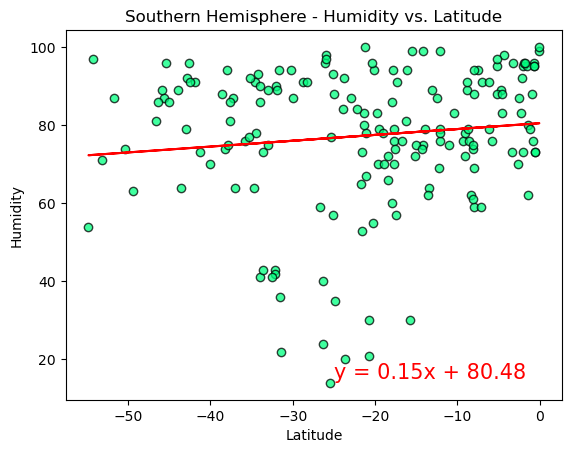

In [29]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],(-25,15), x_label='Latitude', y_label='Humidity', title = 'Southern Hemisphere - Humidity vs. Latitude')

**Discussion about the linear relationship:** 

From these two graphs, we can see that there is little-to-no correlation between humidity and latitude, regardless of the different hemispheres. This can be seen implied given the seemingly random scattered points throughout the plots, as well as with the relatively low r-values for each graph. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06478423462911505


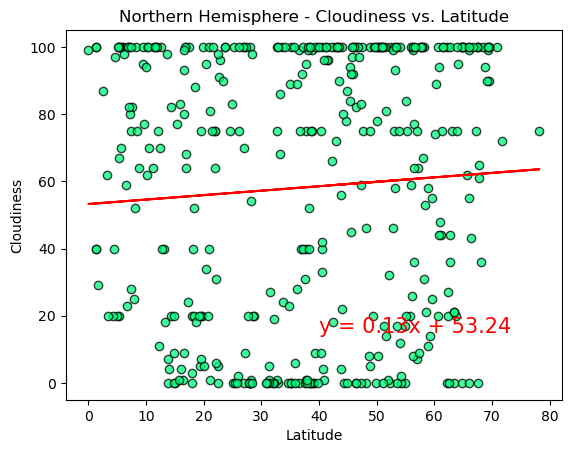

In [30]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],(40,15), x_label='Latitude', y_label='Cloudiness', title = 'Northern Hemisphere - Cloudiness vs. Latitude')

The r-value is: -0.07934349177703338


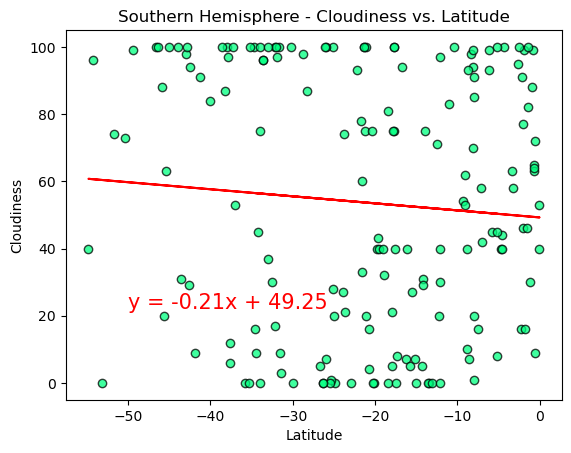

In [33]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],(-50,22), x_label='Latitude', y_label='Cloudiness', title = 'Southern Hemisphere - Cloudiness vs. Latitude')

**Discussion about the linear relationship:** 

From these graphs, it seems like cloudiness and latitude have even less of a correlation between them than the previous variables being observed given that their r-values are drastically low. Even so, when looking at the regression line, it seems like an area could potentially be cloudier the further away it is from the equator, but again, the correlation is very weak which makes it harder to reach a conclusion.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1389501775683272


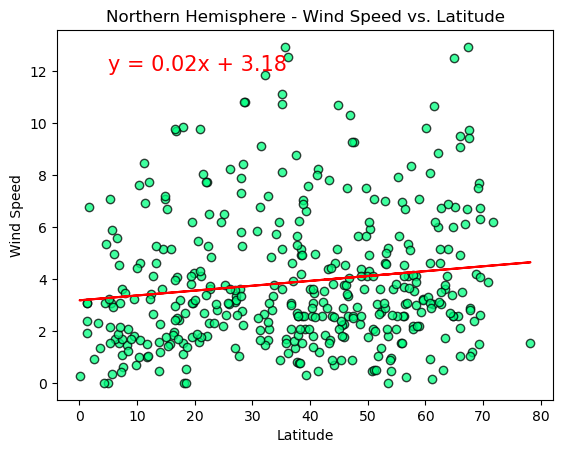

In [35]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],(5,12), x_label='Latitude', y_label='Wind Speed', title = 'Northern Hemisphere - Wind Speed vs. Latitude')

The r-value is: -0.1977601609147364


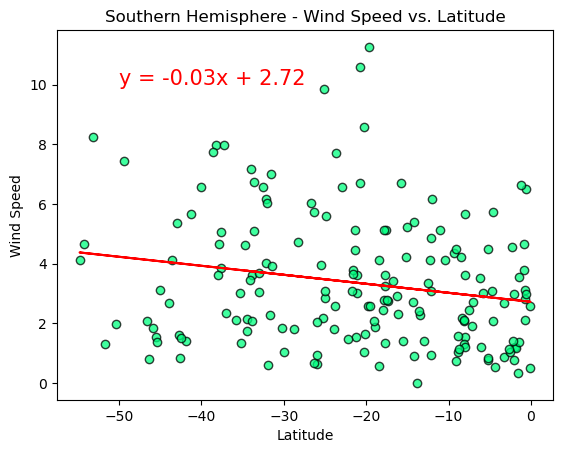

In [37]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],(-50,10), x_label='Latitude', y_label='Wind Speed', title = 'Southern Hemisphere - Wind Speed vs. Latitude')

**Discussion about the linear relationship:** 

From these two graphs, there seems to be a relatively weak correlation between wind speed and latitude. This implies that wind speed may be expected to be higher the further away we are from the equator.